In [1]:
#Import needed packages
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import (
    PassManager, 
    StagedPassManager,
    CouplingMap
)
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    ConsolidateBlocks,
    UnitarySynthesis,
    Unroll3qOrMore, 
    BasisTranslator,
    FullAncillaAllocation,
    EnlargeWithAncilla,
    ApplyLayout,
    SabreLayout,
    SabreSwap,
    SetLayout
)
from qiskit.transpiler.layout import Layout

In [2]:
pass_manager = PassManager()

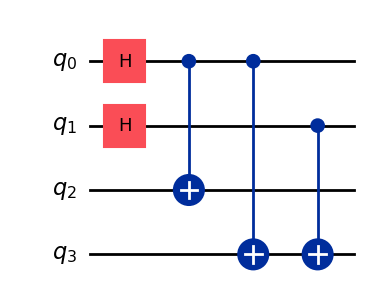

In [3]:
qubits = QuantumRegister(4, name='q')
circ = QuantumCircuit(qubits)

a,b,c,d = qubits

circ.h(a)
circ.cx(a,c)
circ.cx(a,d)
circ.h(b)
circ.cx(b,d)

circ.draw("mpl")

In [8]:
target_basis = ['rx', 'rz', 'cp']
basis_translator = BasisTranslator(SessionEquivalenceLibrary, target_basis)
pass_manager.append(basis_translator)

transpiled = pass_manager.run(circ)
transpiled.draw("mpl")

TranspilerError: "Unable to translate the operations in the circuit: ['cz', 'h'] to the backend's (or manually specified) target basis: ['cz', 'barrier', 'store', 'rz', 'x', 'cp', 'delay', 'reset', 'measure', 'snapshot']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/transpiler_passes.BasisTranslator#translation-errors"

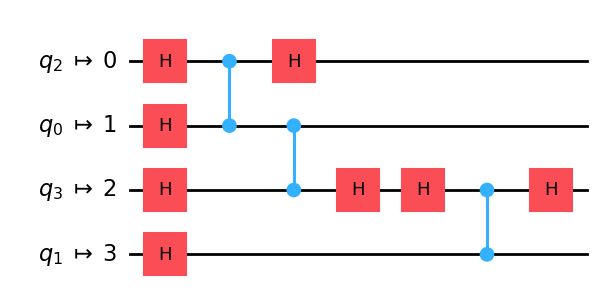

In [5]:
coupling_map = CouplingMap([[0,1],[1,2],[2,3]])

qr = QuantumRegister(4, 'q')
initial_layout = Layout({qr[0]: 0, qr[1]: 1, qr[2]: 2, qr[3]: 3})

pass_manager = PassManager()
pass_manager.append(SetLayout(initial_layout))
pass_manager.append(FullAncillaAllocation(coupling_map))
pass_manager.append(EnlargeWithAncilla())
pass_manager.append(ApplyLayout())
pass_manager.append(SabreLayout(coupling_map))
pass_manager.append(basis_translator)
pass_manager.append(SabreSwap(coupling_map))

transpiled = pass_manager.run(circ)
transpiled.draw("mpl")